### Added results section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
comp_df_orig_rew = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/interim/result_frames/performance/comp_df_orig_rew.pkl")
comp_df_cal_eqodds = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/interim/result_frames/performance/comp_df_cal_eqodds.pkl")

results_df = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/interim/result_frames/performance/results_df.pkl")
results_df_eqodds_cor = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/interim/result_frames/performance/results_df_eqodds_cor.pkl")

In [3]:
race_score_df = pd.merge(comp_df_orig_rew, comp_df_cal_eqodds, left_index=True, right_index=True)
fairness_performance_df = pd.merge(results_df, results_df_eqodds_cor, left_index=True, right_index=True)

fairness_performance_df.columns = race_score_df.columns = ["Initial Model", "Reweighing", "Calibrated Equalized Odds", "Correlation Removal"]

In [4]:
fairness_performance_df

,Initial Model,Reweighing,Calibrated Equalized Odds,Correlation Removal
accuracy,0.903503,0.901495,0.730104,0.906038
precision,0.880481,0.875126,0.689267,0.880305
recall,0.964391,0.968169,0.972828,0.969708
f1,0.920528,0.919299,0.806859,0.922846
roc_auc,0.943499,0.941961,NA,NA
tpr_disparity,0.953057,1.005379,0.950935,0.94203
fpr_disparity,0.773041,1.030013,0.428591,0.75608
tnr_disparity,1.052915,0.992994,2.232092,1.057631
fnr_disparity,2.513832,0.839688,3.250273,3.417939


In [5]:
race_score_df

,Initial Model,Reweighing,Calibrated Equalized Odds,Correlation Removal
Accuracy White,0.906750,0.905242,0.715691,0.909952
Precision White,0.886117,0.885774,0.68482,0.885721
Recall White,0.969923,0.967537,0.978661,0.976586
F1 Score White,0.926128,0.924852,0.805788,0.928937
AUC White,0.940839,0.940210,NA,NA
Accuracy Black,0.885835,0.881110,0.808528,0.884739
Precision Black,0.839948,0.805481,0.725076,0.840838
Recall Black,0.924391,0.972741,0.930644,0.919973
F1 Score Black,0.880149,0.881245,0.815099,0.878627
AUC Black,0.948208,0.948785,NA,NA


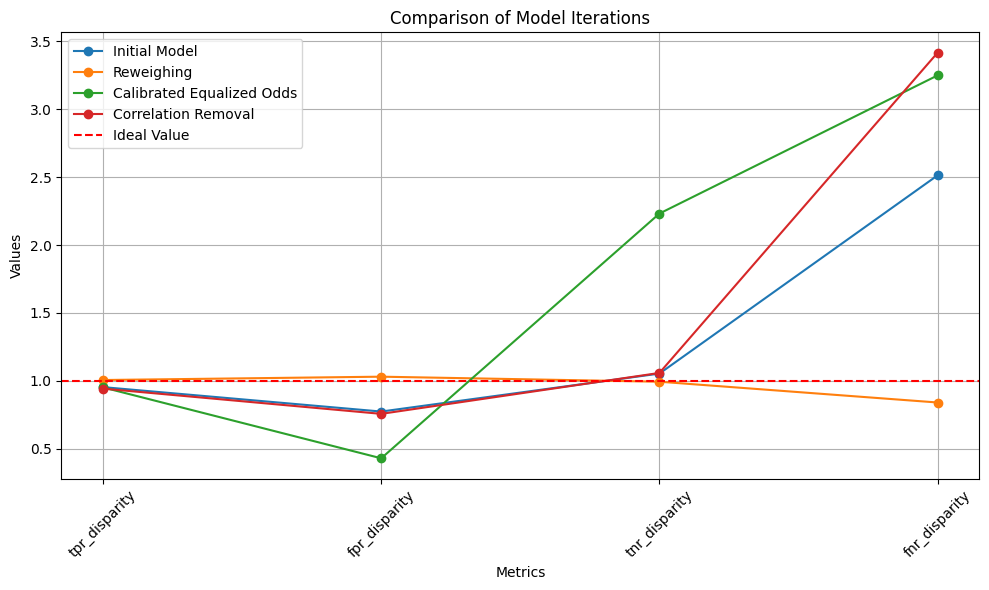

In [6]:
data = {
    'KPI': ['tpr_disparity', 'fpr_disparity', 'tnr_disparity', 'fnr_disparity'],
    fairness_performance_df.columns[0]: [fairness_performance_df[fairness_performance_df.columns[0]][5], fairness_performance_df[fairness_performance_df.columns[0]][6], fairness_performance_df[fairness_performance_df.columns[0]][7], fairness_performance_df[fairness_performance_df.columns[0]][8]],
    fairness_performance_df.columns[1]: [fairness_performance_df[fairness_performance_df.columns[1]][5], fairness_performance_df[fairness_performance_df.columns[1]][6], fairness_performance_df[fairness_performance_df.columns[1]][7], fairness_performance_df[fairness_performance_df.columns[1]][8]],
    fairness_performance_df.columns[2]: [fairness_performance_df[fairness_performance_df.columns[2]][5], fairness_performance_df[fairness_performance_df.columns[2]][6], fairness_performance_df[fairness_performance_df.columns[2]][7], fairness_performance_df[fairness_performance_df.columns[2]][8]],   
    fairness_performance_df.columns[3]: [fairness_performance_df[fairness_performance_df.columns[3]][5], fairness_performance_df[fairness_performance_df.columns[3]][6], fairness_performance_df[fairness_performance_df.columns[3]][7], fairness_performance_df[fairness_performance_df.columns[3]][8]]
}

df = pd.DataFrame(data)
metrics = df['KPI']
iteration1_values = df[fairness_performance_df.columns[0]]
iteration2_values = df[fairness_performance_df.columns[1]]
iteration3_values = df[fairness_performance_df.columns[2]]
iteration4_values = df[fairness_performance_df.columns[3]]

plt.figure(figsize=(10, 6))
plt.plot(metrics, iteration1_values, marker='o', label=fairness_performance_df.columns[0])
plt.plot(metrics, iteration2_values, marker='o', label=fairness_performance_df.columns[1])
plt.plot(metrics, iteration3_values, marker='o', label=fairness_performance_df.columns[2])
plt.plot(metrics, iteration4_values, marker='o', label=fairness_performance_df.columns[3])

plt.axhline(y=1, color='r', linestyle='--', label='Ideal Value')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Model Iterations')

plt.xticks(rotation=45)

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
fairness_performance_df_restructured = fairness_performance_df.iloc[:5]

In [8]:
race_score_df_2 = fairness_performance_df.iloc[5:]

In [9]:
fairness_performance_df_restructured

,Initial Model,Reweighing,Calibrated Equalized Odds,Correlation Removal
accuracy,0.903503,0.901495,0.730104,0.906038
precision,0.880481,0.875126,0.689267,0.880305
recall,0.964391,0.968169,0.972828,0.969708
f1,0.920528,0.919299,0.806859,0.922846
roc_auc,0.943499,0.941961,NA,NA


In [10]:
race_score_df

,Initial Model,Reweighing,Calibrated Equalized Odds,Correlation Removal
Accuracy White,0.906750,0.905242,0.715691,0.909952
Precision White,0.886117,0.885774,0.68482,0.885721
Recall White,0.969923,0.967537,0.978661,0.976586
F1 Score White,0.926128,0.924852,0.805788,0.928937
AUC White,0.940839,0.940210,NA,NA
Accuracy Black,0.885835,0.881110,0.808528,0.884739
Precision Black,0.839948,0.805481,0.725076,0.840838
Recall Black,0.924391,0.972741,0.930644,0.919973
F1 Score Black,0.880149,0.881245,0.815099,0.878627
AUC Black,0.948208,0.948785,NA,NA


In [11]:
race_score_df_2

,Initial Model,Reweighing,Calibrated Equalized Odds,Correlation Removal
tpr_disparity,0.953057,1.005379,0.950935,0.94203
fpr_disparity,0.773041,1.030013,0.428591,0.75608
tnr_disparity,1.052915,0.992994,2.232092,1.057631
fnr_disparity,2.513832,0.839688,3.250273,3.417939
